# Learning how to do AI for MDP


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue
import tkinter as tk
from tkinter import ttk

LARGE_FONT = ("Verdana 12")



In [99]:
#Trying Out tkinter to simulate Andriod. #mainly  for trolling
class BackgroundFrame(tk.Tk):
    def __init__(self,*args,**kwargs): #args = arguments, kwargs refers to keyword arguments.
        tk.Tk.__init__(self,*args,**kwargs)     #initialize tkinter

#         tk.Tk.iconbitmap(self, default = "sanicisgood.ico")
#         tk.Tk.wm_title(self, "Gotta GO fast")

        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        #fill will fill in the space that is allocated in
        #expand is beyond the limits that you set.
        
        container.grid_rowconfigure(0,weight=1) #0 is the setting of minimum size
        container.grid_columnconfigure(0,weight=1) #weight is the priority
        frame  = mainPage(container,self)
        frame.grid(row=0, column= 0, sticky= "nsew")
        self.tkraise()
        
    
        
class mainPage(tk.Frame): #inherits from tk.frame
        Entr= [] #What if  we made this a 2D array. 
        numberlbl= []
        j=0
        def __init__(self, parent, controller):
            self.controller = controller
            tk.Frame.__init__(self,parent)
            label = ttk.Label(self, text= "lol",font = LARGE_FONT)
            label.pack(pady=0,padx=0)
            ADD = ttk.Button(self, text="Add More Obstacles",command = self.addmoreobstacles)
            ADD.pack(side="top", ipady=0, ipadx=7)
            
            DEL = ttk.Button(self, text="Remove Obstacles",command = self.deleteboxes)
            DEL.pack(side="top", ipady=0, ipadx=7)

        #Add positions of the obstacles along with image or not?
        
        def addmoreobstacles(self): #boxes at the bottom of the start frame
            InEntr=[]
            for i in range(3):
                ENT = ttk.Entry(width=5) #add self for it to be under the same class
                InEntr.append(ENT)
                
            print(InEntr)
            mainPage.Entr.append(InEntr) #need to call the class to acquire the variable
            print(mainPage.Entr)    
            for i in range(3):
                mainPage.numberlbl.append(ttk.Label(self,text= (str(len(mainPage.Entr)), )))  #number label for the boxes
                mainPage.numberlbl[-1].pack(side="left", pady=0, padx=27.5)
                mainPage.Entr[mainPage.j][i].pack(side="left", pady=5, padx=0, ipady=0, ipadx=15)
            mainPage.j+=1
                
        def deleteboxes(self):
            for i in range(3):
                mainPage.Entr[-1][i].pack_forget()
                mainPage.numberlbl[-1].pack_forget()
                del mainPage.numberlbl[-1]
            del mainPage.Entr[-1]
            mainPage.j-=1
            
            


app = BackgroundFrame()
app.mainloop() #inherited from tkinter



In [1]:
#Helper Function for plotting the maze.

def printBinaryMaze(mazeGrid): #Passing the maze grid as a parameter
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    
    print()
    for i in range(height):
        for j in range(width):
            if mazeGrid[i,j] == 1:
                print("\u25a9", end = " ") 
                # above generatres a block
            elif mazeGrid[i,j] == 0:
                print(".", end = " ")
        print()
        
        
def showBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)
    
    
def showBinaryMazeProblem(mazeGrid, start, goal):
    ''' Display the maze corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the maze with markers
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255
    
    mazeGrid[start[1], start[1]] = 128
    mazeGrid[goal[1], goal[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)


In [5]:
#Creating Maze

maze=[]
for i in range(22):
    inner = []
    for j in  range(22):
        if(i==0 or i ==21):
            inner.append(1)
            continue
        if(j==0 or j==21):
            inner.append(1)
            continue
        inner.append(0)
    maze.append(inner)
        
GOALLIST=[]    
GOALLIST.append((2, 2, 'E'))


ObstacleList = []
num = input("How many obstacles?")
for i in range(int(num)):
    Xcoords = int(input("Please Enter the obstacle X coords"))
    Ycoords = int(input("Please Enter the obstacle Y coords"))
    Direction = int(input("Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West"))
    
   #Xcoords == I, Ycoords == J 
    
    maze[Xcoords][Ycoords]=1
    if(Direction ==1):
        maze[Xcoords-2][Ycoords]=0.5
        GOALLIST.append((Xcoords-2,Ycoords,"S"))
        ObstacleList.append((Xcoords-1,Ycoords-1,"N"))

    elif(Direction == 2):
        maze[Xcoords+2][Ycoords]=0.5
        GOALLIST.append((Xcoords+2,Ycoords,"N"))
        ObstacleList.append((Xcoords-1,Ycoords-1,"S"))
        
    elif(Direction ==3):
        maze[Xcoords][Ycoords+2]=0.5
        GOALLIST.append((Xcoords,Ycoords+2,"W"))
        ObstacleList.append((Xcoords-1,Ycoords-1,"E"))
        
    elif(Direction ==4):
        maze[Xcoords][Ycoords-2]=0.5
        GOALLIST.append((Xcoords,Ycoords-2,"E"))
        ObstacleList.append((Xcoords-1,Ycoords-1,"W"))
    
    else:
        ObstacleList.append((Xcoords-1,Ycoords-1,"NIL"))
        
        
        
for i in range(len(maze)):
    print(maze[i],'\n')
    
print(GOALLIST)
print(ObstacleList)
# Convert to a NumPy array
maze = np.array(maze)
        

How many obstacles?4
Please Enter the obstacle X coords4
Please Enter the obstacle Y coords6
Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West3
Please Enter the obstacle X coords7
Please Enter the obstacle Y coords10
Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West2
Please Enter the obstacle X coords8
Please Enter the obstacle Y coords15
Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West2
Please Enter the obstacle X coords12
Please Enter the obstacle Y coords3
Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West3
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 

[1, 0, 0, 0, 0, 0, 1, 0, 0.5, 0, 0, 0, 0, 0, 0, 

In [6]:
print(ObstacleList)

[(3, 5, 'E'), (6, 9, 'S'), (7, 14, 'S'), (11, 2, 'E')]


In [7]:
def greedy_sort(coordinates):
    path = []
    current_point = coordinates[0]
    while coordinates:
        closest_point = min(coordinates, key=lambda x: ((x[0]-current_point[0])**2 + (x[1]-current_point[1])**2)**0.5)
        path.append(closest_point)
        current_point = closest_point
        coordinates.remove(closest_point)
    return path

In [8]:
GOALLIST

[(2, 2, 'E'), (4, 8, 'W'), (9, 10, 'N'), (10, 15, 'N'), (12, 5, 'W')]

In [9]:
GOALLIST = greedy_sort(GOALLIST)
GOALLIST

[(2, 2, 'E'), (4, 8, 'W'), (9, 10, 'N'), (10, 15, 'N'), (12, 5, 'W')]

In [10]:
# # Create the Maze
# # 0 : empty cell, reachable within a path
# # 1 : blocked cell or wall, not reachable
# # 2: Position of where the image is. 

# GOALLIST=[]




# # maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 1, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 1, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 1, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1],
# #         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]]

# GOALLIST = [(2,2,"E")]
# print(len(maze))
# for i in range(len(maze)):
#     for x in range(len(maze)):
#         if(maze[i][x]==0.5):
#             GOALLIST.append((i,x,"W"))  #Try all facing west

# print(GOALLIST)
# # Convert to a NumPy array
# maze = np.array(maze)

# # # Print the maze using helper functions
# # print("Maze of dimensions", maze.shape)
# # printBinaryMaze(maze)

In [11]:
# # Create the Maze
# # 0 : empty cell, reachable within a path
# # 1 : blocked cell or wall, not reachable
# # 2: Position of where the image is. 

# GOALLIST=[]

# maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

# print(len(maze))
# for i in range(len(maze)):
#     for x in range(len(maze)):
#         if(maze[i][x]==2):
#             GOALLIST.append((i,x))

# print(GOALLIST)
# # Convert to a NumPy array
# maze = np.array(maze)

# # Print the maze using helper functions
# print("Maze of dimensions", maze.shape)
# #printBinaryMaze(maze)

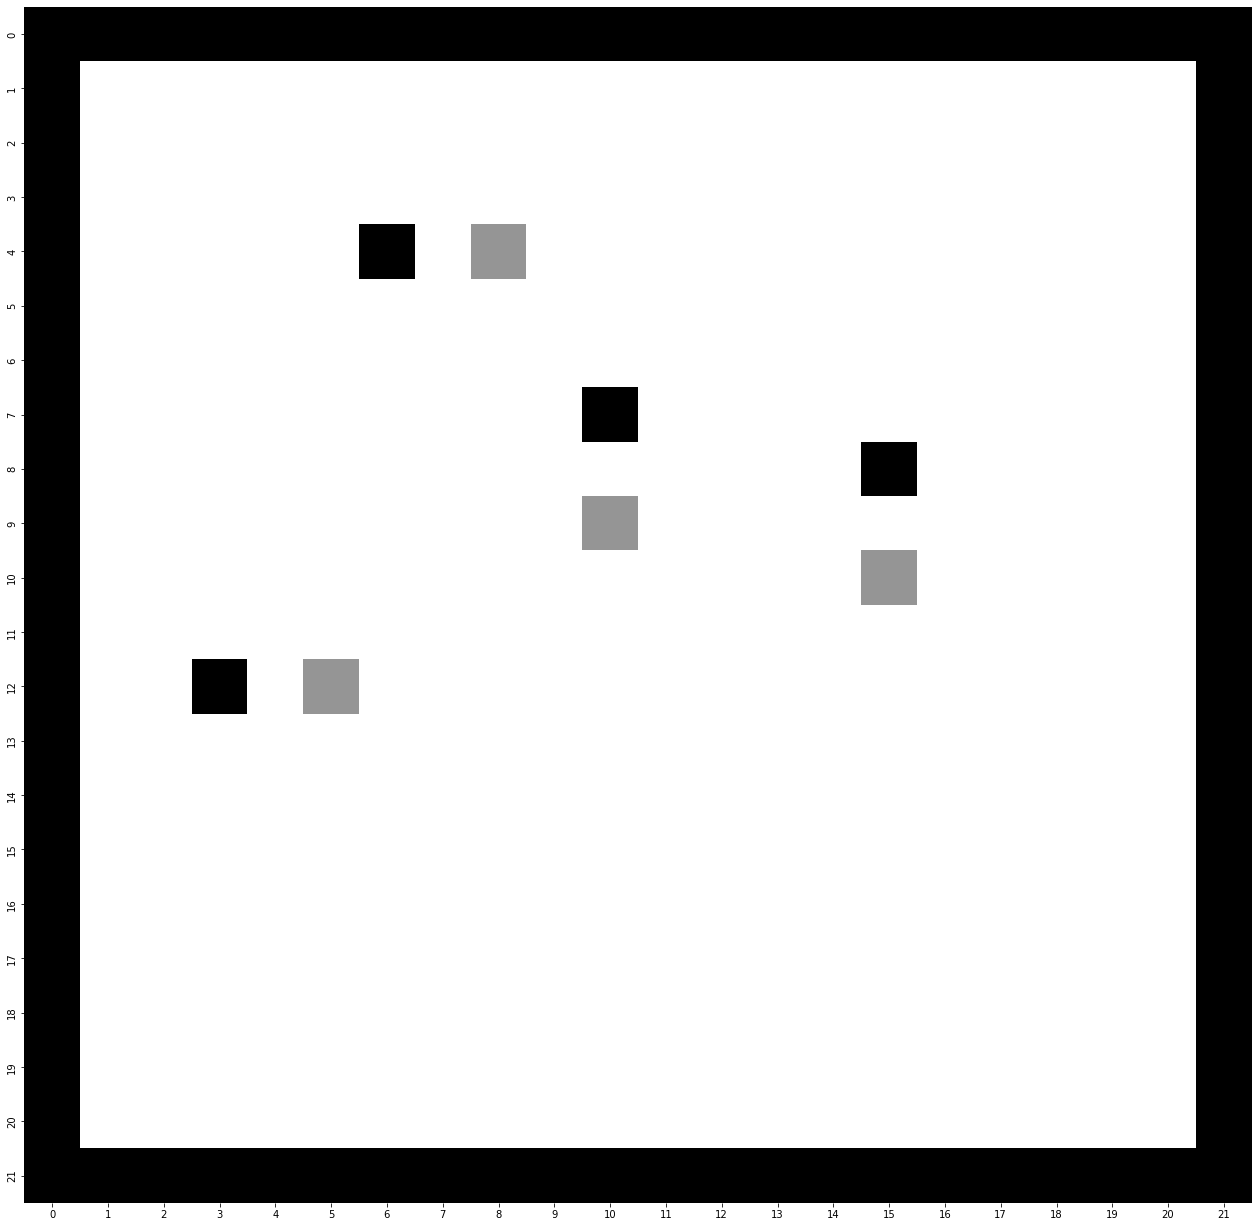

In [12]:
# Show the maze using helper functions
showBinaryMaze(maze)


## How do we define our start and end goal?

In [13]:
#IIRC start position happens on the bottom left of the platform
#End goal for the first assessment refers to the last obstacle furthest from the
#start goal

#For the second assesment, the end goal should be the same as the start goal with
#the start goal being the last obstacle it has to reach.

In [14]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {} #why are edges dictionary?
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]   

In [15]:
# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    
    directions = ["N","S","E", "W"]
    mazeGraph = MazeGraph() #this initialize the class to mazeGraph
    (height, width) = mazeGrid.shape #numpy array dimensions into a tuple?
    
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes
            #Instead of consdiering blank cells as nodes, try to allow obstacles to be nodes.
            if mazeGrid[i,j] != 1:

                
                # Adjacent cell : Top
                
                for d in directions:
                    neighbors = []
#                 if (i> 1) and mazeGrid[i-2,j] != 1 and mazeGrid[i-2,j+1] !=1 and mazeGrid[i-2, j-1]!=1:  #if the mazegrid is top is not an obstacle
#                     neighbors.append(((i-1,j), 1)) #append a tuple in a tuple to the neighbour
                
                
#                 # Adjacent cell : Left                
#                 if (j> 1)  and mazeGrid[i,j-2] != 1 and mazeGrid[i-1, j-2] !=1 and mazeGrid[i+1, j-2]!=1:
#                     neighbors.append(((i,j-1), 1))

                    
#                 # Adjacent cell : Bottom                    
#                 if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
#                     neighbors.append(((i+1,j), 1))
     
#                 # Adjacent cell : Right                    
#                 if (j < width - 2)  and mazeGrid[i,j+2] != 1 and mazeGrid[i-1,j+2] != 1 and mazeGrid[i+1,j+2] != 1: #this check maybe out of range
#                     neighbors.append(((i,j+1), 1))
                
                #moveforwardinthecurrentdirection. 
                    
        
                    if(d=="N"):
                        #move forward
                        if(i>1) and mazeGrid[i-2,j]!=1 and mazeGrid[i-2, j+1]!=1 and mazeGrid[i-2,j-1]!=1:
                            neighbors.append(((i-1,j,d),1,["FW010"]))
                        
                        #move backwards
                        if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
                            neighbors.append(((i+1,j,d),1,["BW010"]))
                            
                        #forward left turn
                        exit = False
                        if (j>4 and i>4): #ensure that it is within the border
                            for row in range(2,5):
                                if exit ==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if (exit==False):    
                            neighbors.append(((i-3, j-3,"W"),100,["FL090"])) #increase weights to reduce turning 
                            
                        
                        #forward right turning 
                        exit = False
                        if(i>4 and j< width-5):
                            for row in range(2,5):
                                if exit == True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-3, j+3,"E" ),100, ["FR090"])) #increase weights to reduce turning    
                        
                        #Backward left Turning
                        exit=False
                        if(i< height-5 and j>4):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j-3,"E"),100, ["BL090"])) #increase weights to reduce turning         
                        
                        #Backwards Right Turning
                        exit = False
                        if(i<height-5 and j<width-5):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j+3,"W"),100,["BR090"])) #increase weights to reduce turning     
                        
                        
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                            
                    if(d=="S"): #Vehicle is currently facing south
                        #move forwards
                        if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
                            neighbors.append(((i+1,j,d),1, ["FW010"]))
                        
                        #move backwards
                        if(i>1) and mazeGrid[i-2,j]!=1 and mazeGrid[i-2, j+1]!=1 and mazeGrid[i-2,j-1]!=1:
                            neighbors.append(((i-1,j,d),1, ["BW010"]))
                            
                        
                        #move forward left turning
                        exit = False
                        if(i<height-5 and j<width-5):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j+3,"E"),100, ["FL090"])) #increase weights to reduce turning   
                        
                        #move forward right turning
                        exit=False
                        if(i< height-5 and j>4):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j-3,"W"),100,["FR090"])) #increase weights to reduce turning
                            
                        
                        #move backwards left turning
                        exit = False
                        if(i>4 and j< width-5):
                            for row in range(2,5):
                                if exit == True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break   
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-3, j+3,"W"),100,["BL090"])) #increase weights to reduce turning    
                            
                        #move backwards right turning     
                        exit = False
                        if (j>4 and i>4):
                            for row in range(2,5):
                                if exit ==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if exit==False :    
                            neighbors.append(((i-3, j-3,"E"),100,["BR090"])) #increase weights to reduce turning 
                        
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                            
                        
                    if(d=="W"): #facing the west direction
                        #move forwards
                        if (j > 1)  and  mazeGrid[i,j-2] != 1 and mazeGrid[i-1,j-2] != 1 and mazeGrid[i+1,j-2] != 1:
                            neighbors.append(((i,j-1,d),1, ["FW010"]))
                        
                        #move backwards
                        if(j<width -2) and mazeGrid[i,j+2]!=1 and mazeGrid[i-1, j+2]!=1 and mazeGrid[i+1,j+2]!=1:
                            neighbors.append(((i,j+1,d),1,["BW010"]))
                        
                        #move forward left turn
                        exit=False
                        if(i< height-5 and j>4):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j-col] ==1 or mazeGrid[i+1, j-col] ==1 or mazeGrid[i-1, j-col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j-3,"S"),100, ["FL090"])) #increase weights to reduce turning  
                        
                        #move forward right turn 
                        exit = False
                        if (j>4 and i>4):
                            for row in range(2,5):
                                if exit ==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j-col]==1 or mazeGrid[i-1,j-col]==1 or mazeGrid[i+1,j-col]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                            
                        if exit==False :    
                            neighbors.append(((i-3, j-3,"N"),100, ["FR090"])) #increase weights to reduce turning 
                            
                        
                        #move backwards left turn
                        exit = False
                        if(i<height-5 and j<width-5):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j+col] ==1 or mazeGrid[i+1, j+col] ==1 or mazeGrid[i-1, j+col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j+3,"N" ),100,["BL090"])) #increase weights to reduce turning   
                        
                        #move backwards right turn
                        exit = False
                        if(i>4 and j< width-5):
                            for row in range(2,5):
                                if exit == True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j+col]==1 or mazeGrid[i-1,j+col]==1 or mazeGrid[i-1,j+col]==1):
                                        exit =True
                                        break
                                        
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-3, j+3,"S"),100,["BR090"])) #increase weights to reduce turning    
                            
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                    
                    if(d == "E"):
                        #move forward
                        if(j<width -2) and mazeGrid[i,j+2]!=1 and mazeGrid[i-1, j+2]!=1 and mazeGrid[i+1,j+2]!=1:
                            neighbors.append(((i,j+1,d),1, ["FW010"]))
                        
                        #move backwards
                        if (j > 1)  and  mazeGrid[i,j-2] != 1 and mazeGrid[i-1,j-2] != 1 and mazeGrid[i+1,j-2] != 1:
                            neighbors.append(((i,j-1,d),1,["BW010"]))
                        
                        #move forward right turn
                        exit = False
                        if(i<height-5 and j<width-5):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j+col] ==1 or mazeGrid[i-1, j+col] ==1 or mazeGrid[i+1, j+col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                        if exit==False:    
                            neighbors.append(((i+3, j+3,"S"),100,[ "FR090"])) #increase weights to reduce turning  
                            
                        #move forward left turn
                        exit = False
                        if(i>4 and j< width-5):
                            for row in range(2,5):
                                if exit == True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j+col]==1 or mazeGrid[i+1,j+col]==1 or mazeGrid[i-1,j+col]==1):
                                        exit =True
                                        break   
                                        
                        else:
                            exit=True
                        if exit==False:    
                            neighbors.append(((i-3, j+3,"N"),100, ["FL090"])) #increase weights to reduce turning 

                        
                        #move backwards left turn
                        exit = False
                        if (j>4 and i>4):
                            for row in range(2,5):
                                if exit ==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j-col]==1 or mazeGrid[i-1,j-col]==1 or mazeGrid[i+1,j-col]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if exit==False :    
                            neighbors.append(((i-3, j-3,"S"),100,["BL090"])) #increase weights to reduce turning 
                            
                        
                        #move backwards right turn
                        exit= False
                        if(i< height-5 and j>4):
                            for row in range(2,5):
                                if exit==True:
                                    break
                                for col in range(2,5):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j-col] ==1 or mazeGrid[i+1, j-col] ==1 or mazeGrid[i-1, j-col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+3, j-3,"N"),100,["BR090"])) #increase weights to reduce turning
                        
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                        
                        
                    
    return mazeGraph

In [16]:
### Convert the maze to a graph
mazegraph = maze_to_graph(maze)

# Print the edges with weights
mazegraph.all_edges()

#mazegraph.neighbors((9,10))


{(1, 2, 'N'): [((2, 2, 'N'), 1, ['BW010'])],
 (1, 2, 'S'): [((2, 2, 'S'), 1, ['FW010'])],
 (1, 3, 'N'): [((2, 3, 'N'), 1, ['BW010'])],
 (1, 3, 'S'): [((2, 3, 'S'), 1, ['FW010'])],
 (1, 4, 'N'): [((2, 4, 'N'), 1, ['BW010'])],
 (1, 4, 'S'): [((2, 4, 'S'), 1, ['FW010'])],
 (1, 5, 'N'): [((2, 5, 'N'), 1, ['BW010'])],
 (1, 5, 'S'): [((2, 5, 'S'), 1, ['FW010'])],
 (1, 6, 'N'): [((2, 6, 'N'), 1, ['BW010'])],
 (1, 6, 'S'): [((2, 6, 'S'), 1, ['FW010'])],
 (1, 7, 'N'): [((2, 7, 'N'), 1, ['BW010'])],
 (1, 7, 'S'): [((2, 7, 'S'), 1, ['FW010'])],
 (1, 8, 'N'): [((2, 8, 'N'), 1, ['BW010']), ((4, 11, 'W'), 100, ['BR090'])],
 (1, 8, 'S'): [((2, 8, 'S'), 1, ['FW010']), ((4, 11, 'E'), 100, ['FL090'])],
 (1, 9, 'N'): [((2, 9, 'N'), 1, ['BW010']), ((4, 12, 'W'), 100, ['BR090'])],
 (1, 9, 'S'): [((2, 9, 'S'), 1, ['FW010']), ((4, 12, 'E'), 100, ['FL090'])],
 (1, 10, 'N'): [((2, 10, 'N'), 1, ['BW010']), ((4, 13, 'W'), 100, ['BR090'])],
 (1, 10, 'S'): [((2, 10, 'S'), 1, ['FW010']), ((4, 13, 'E'), 100, ['FL090

In [17]:
def showBinaryMazePath(mazeGrid, mazePath):
    ''' Display the maze corresponding to a binary grid
        Display path(s) superimposed on the binary grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinates of the paths on the maze
        Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    for x in mazePath:
        for node in x:
            mazeGrid[node[0], node[1]] = 128   # half level of grayscale (0 to 255) to highlight the path
#             mazeGrid[node[0]+1,node[1]+1]=200
#             mazeGrid[node[0], node[1]+1]=200
#             mazeGrid[node[0]+1, node[1]]=200
#             mazeGrid[node[0]-1, node[1]-1]=200
#             mazeGrid[node[0]-1, node[1]]=200
#             mazeGrid[node[0], node[1]-1]=200
#             mazeGrid[node[0]-1, node[1]+1]=200
#             mazeGrid[node[0]+1, node[1]-1]=200
            
#     for node in mazePath:
#         mazeGrid[node[0], node[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

In [18]:
def heuristic(nodeA, nodeB):
    (xA, yA, AD) = nodeA #gets the coodinates of X and Y of current node 
    (xB, yB,BD) = nodeB #gets the coordinates of X and Y of Destination node
    return abs(xA - xB) + abs(yA - yB)


# A*-Search (A*S) with Priority Queue

def astar_search(mazeGraph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight, action in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node/ Calculating g(n)
            newcost = pathcost[currentNode] + weight
            
            if (nextNode not in explored) or (newcost < pathcost[nextNode]): #if the newcost is smaller then the nextNode
                # priority= #f(n) = h(n) + g(n); 
                priority = heuristic(nextNode, goal) + newcost 
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                #Stores the parent node of the nextnode into explored
                explored[nextNode] = currentNode,action
                
                #updates g(n) for the nextNode
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents
def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path
    actions = []
    direction = ['N' ,'S' ,'E' ,'W']
    cantreachgoal=False
    # stop when backtrack reaches start node
    actions+=explored[currentNode][1]
    while currentNode != start:
        # grow the path backwards and backtrack
        flag= 0
        path.append(currentNode)
        try:
            currentNode = explored[currentNode][0]
        except KeyError:
            num = direction.index(currentNode[2])
            if num==3:
                num=-1
            currentNode = (currentNode[0],currentNode[1], direction[num+1])
            cantreachgoal = True
            flag = 0
            
        if (flag==0):
            try:
                actions+=explored[currentNode][1]
            except TypeError:
                continue
        else:
            continue
        
            #Try Changing to left or right
        #currentNode = explored[currentNode]
    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal
    
    actions.append
    actions.reverse()
    return path, cantreachgoal, actions

[(2, 2, 'E'), (4, 8, 'W'), (9, 10, 'N'), (10, 15, 'N'), (12, 5, 'W')]
path 0 = [(2, 2, 'E'), (2, 3, 'E'), (2, 4, 'E'), (2, 5, 'E'), (5, 8, 'S'), (6, 8, 'S'), (7, 8, 'S'), (4, 11, 'W'), (4, 10, 'W'), (4, 9, 'W'), (4, 8, 'W')]
path 1 = [(4, 8, 'W'), (4, 9, 'W'), (7, 12, 'N'), (8, 12, 'N'), (9, 12, 'N'), (12, 9, 'E'), (12, 8, 'E'), (12, 7, 'E'), (9, 10, 'N')]
path 2 = [(9, 10, 'N'), (10, 10, 'N'), (13, 7, 'E'), (13, 8, 'E'), (13, 9, 'E'), (13, 10, 'E'), (13, 11, 'E'), (13, 12, 'E'), (10, 15, 'N')]
path 3 = [(10, 15, 'N'), (11, 15, 'N'), (12, 15, 'N'), (13, 15, 'N'), (14, 15, 'N'), (15, 15, 'N'), (12, 12, 'W'), (12, 11, 'W'), (12, 10, 'W'), (12, 9, 'W'), (12, 8, 'W'), (12, 7, 'W'), (12, 6, 'W'), (12, 5, 'W')]
A*-Search (A*S)

Total nodes in maze : 392
Total nodes visited : 51  |  13.01 %
Final path distance : 14

Path through the Maze : [[(2, 2, 'E'), (2, 3, 'E'), (2, 4, 'E'), (2, 5, 'E'), (5, 8, 'S'), (6, 8, 'S'), (7, 8, 'S'), (4, 11, 'W'), (4, 10, 'W'), (4, 9, 'W'), (4, 8, 'W')], [(4, 8,

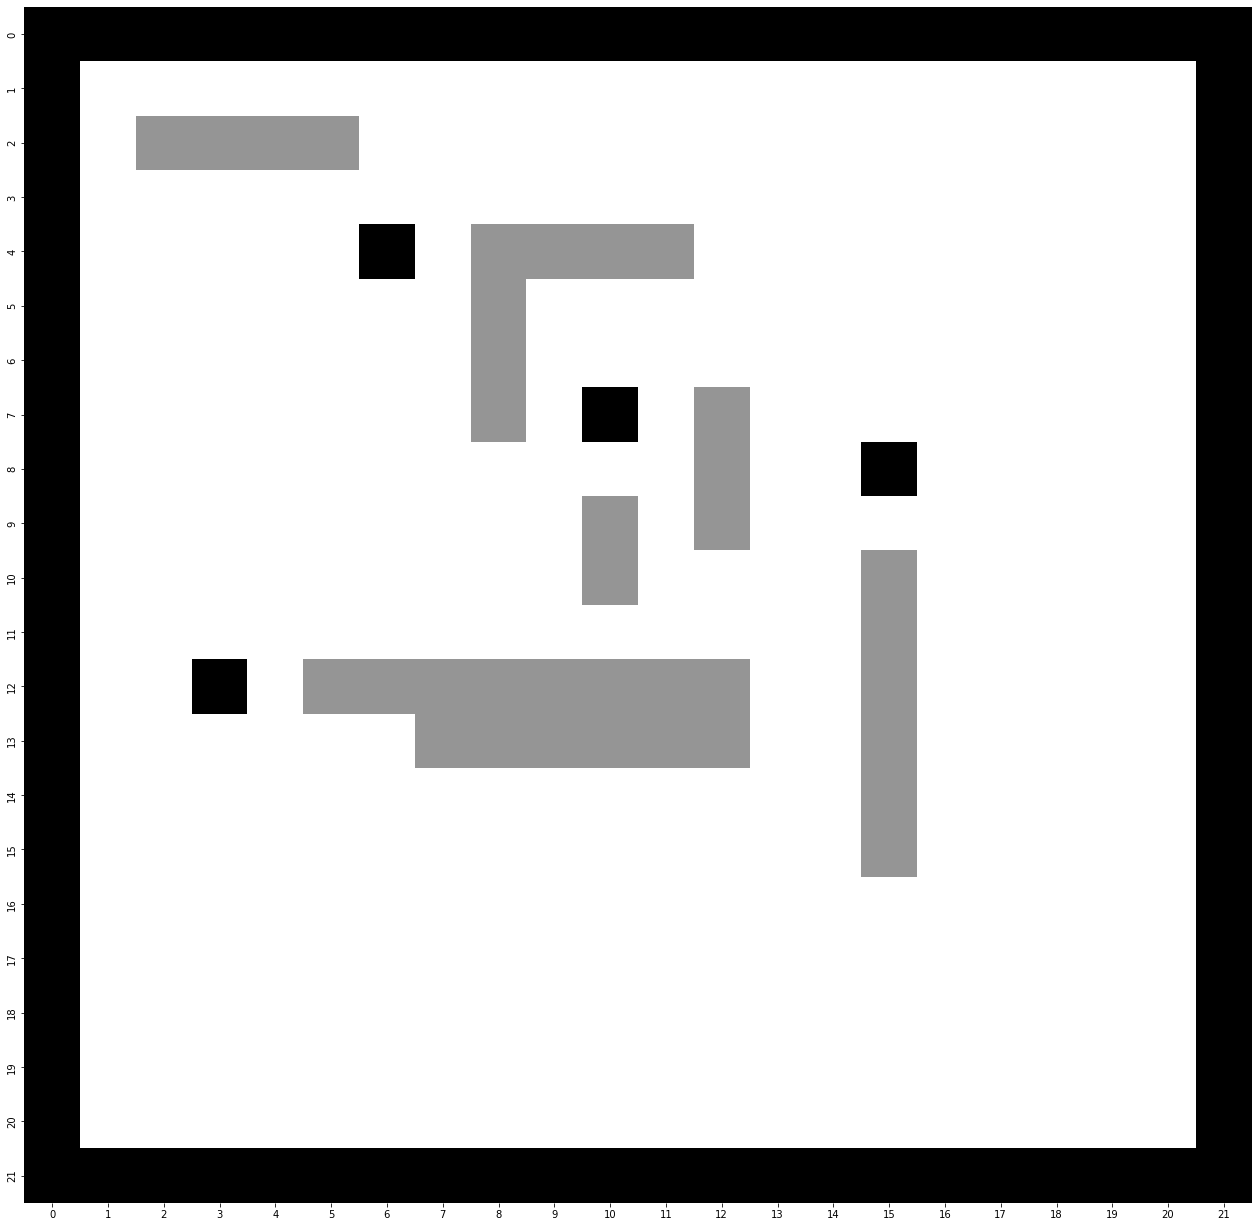

In [19]:
# Define start and goal positions
#START = (1,1)

print(GOALLIST)

cantreachgoal =False 
# Run the A*S algorithm for path finding
lol = []
FinalActions =[]
for i in range(len(GOALLIST)-1):
    if cantreachgoal == True:
        BT = lol[i-1][-2]
        nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = BT , goal = GOALLIST[i+1])
        path, cantreachgoal,actions= reconstruct_path(nodesExplored, start = BT, goal = GOALLIST[i+1])
    else:    
        nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = GOALLIST[i] , goal = GOALLIST[i+1])
        path, cantreachgoal,actions = reconstruct_path(nodesExplored, start = GOALLIST[i], goal = GOALLIST[i+1])

    lol.append(path)
    FinalActions+=actions
#     print(lol)
    print("path",i, "=", path)
    
# i=0
# nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = GOALLIST[i] , goal = GOALLIST[i+1])
# path, cantreachgoal = reconstruct_path(nodesExplored, start = GOALLIST[i], goal = GOALLIST[i+1])


# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", lol)
print("Actions throught the Maze", FinalActions)
showBinaryMazePath(maze,lol)
#showBinaryMazePath(maze, path)

In [20]:
#Creating Json File

import json
file = "testing123.json"

def write_json(data,filename = "testing234.json"):
    with open(filename, "w") as f:
        json.dump(data, f, indent = 4)
        
data = FinalActions
write_json(data)

In [23]:
#Trying Out tkinter to simulate Andriod.
Goalstate = [(2, 2, 'E'), (4, 8, 'W'), (9, 10, 'N'), (10, 15, 'N'), (12, 5, 'W')]
ObstacleList = [(3, 5, 'E'), (6, 9, 'S'), (7, 14, 'S'), (11, 2, 'E')]



import tkinter as tk
from tkinter import ttk
from tkinter import *
from PIL import Image,ImageTk
import time

class BackgroundFrame(tk.Tk):
    def __init__(self,*args,**kwargs): #args = arguments, kwargs refers to keyword arguments.
        tk.Tk.__init__(self,*args,**kwargs)     #initialize tkinter

        tk.Tk.iconbitmap(self, default = "sanicisgood.ico")
        tk.Tk.wm_title(self, "Gotta GO fast")
        
        ws = self.winfo_screenwidth() #get the pixels lengths  for width
        hs = self.winfo_screenheight() #get the  pixel lengths for the height
        print(ws,hs)
        self.geometry('%dx%d'%(ws*0.5,hs*0.5)) #make the window almost to the full screen
        
    
        container = tk.Frame(height = hs*0.5, width = ws*0.5)
        container.pack(side="top",fill="both", expand=True )
        
        #fill will fill in the space that is allocated in
        #expand is beyond the limits that you set.
        
       
        container.grid_rowconfigure(0,weight=1) #0 is the setting of minimum size
        container.grid_columnconfigure(0,weight=1) #weight is the priority
        frame  = mainPage(container,self)
        frame.grid(row=0, column= 0, sticky= "nsew")
        self.tkraise()
        
    
        
class mainPage(tk.Frame): #inherits from tk.frame
        def __init__(self, parent, controller):
            self.controller = controller
            tk.Frame.__init__(self,parent)
            w= self.winfo_screenwidth() *0.5-30
            h = self.winfo_screenheight()*0.5-30

        
            self.viewGrid = Canvas(self, width=w, height=h,bg="#ddd")
            self.viewGrid.pack(side="top", fill= "both", expand = True)
            ADD = ttk.Button(self, text="Add Entry Boxes",command = self.addmoreboxes)
            ADD.pack(side="right", ipady=0, ipadx=7)
        
            
            #viewGrid.grid(row = 20, column =20, sticky = "nsew")
            
 
            gridWidth= int(w/20)
            gridHeight = 34
            
            print(gridWidth, gridHeight)
            rowNumber = 0
            for row in range(20):
                for col in range(20):
                    rect = self.viewGrid.create_rectangle(col*gridWidth,row*gridHeight, (col+1)*gridWidth, (row+1)*gridHeight, fill = 'grey')
            carimg= (Image.open("CarImage.png"))
            self.resizedcar_image = carimg.resize((102,102), Image.ANTIALIAS)
            self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image) #rotation degree is towards the left
            
            Xstart, Ystart = 51, 629
            self.testingimage = self.viewGrid.create_image(Xstart,Ystart,image=self.newcar_image)
            
            
            obstimg = (Image.open("Obstacle Image.png"))
            resizedobstacle_image = obstimg.resize((34,34), Image.ANTIALIAS)
            
            obstonly = Image.open("Obstacle Only.png")
            resizedobstacle = obstonly.resize((34,34), Image.ANTIALIAS)
            
            self.obstacleArray=[]
            for x in range(len(ObstacleList)):
                rotationalvalue = 0
                xvalue = ObstacleList[x][0] * 34+17
                yvalue = ObstacleList[x][1] * 34 +17
                
                print(ObstacleList[x])
                if(ObstacleList[x][2] == 'N'):
                    rotationalvalue  = 90
                elif (ObstacleList[x][2] == 'W'):
                    rotationalvalue  = 180
                elif(ObstacleList[x][2] == 'S'):
                    rotationalvalue= 270
                elif(ObstacleList[x][2] == 'E'):
                    rotationalvalue = 0
                
                if(ObstacleList[x][2] != 'NIL'):
                    self.newobst_image= ImageTk.PhotoImage(resizedobstacle_image.rotate(rotationalvalue))
                    self.obstacleArray.append(self.newobst_image)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])
                else:
                    self.newobst = ImageTk.PhotoImage(resizedobstacle)
                    self.obstacleArray.append(self.newobst)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])
                
                
            self.currentdirection ="N" #This position is in accordance to the python tkinter board. 
            PathIteration = ttk.Button(self, text="PathIteration",command = self.pathsequence)
            PathIteration.pack(side="right", ipady=0, ipadx=7)

            self.value=0
            
            
            
        def pathsequence(self):
                self.stepactions = FinalActions[self.value]
                print(self.stepactions)
                print(self.value)
                if(self.stepactions == "FW010"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 0, -34)
                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 0, 34)
                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,-34, 0)
                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,34,0)
                if(self.stepactions == "BW010"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 0, 34)
                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 0, -34)
                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,34, 0)
                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-34,0)

                        
                if(self.stepactions == "FL090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, -102, -102)
                        self.currentdirection = "W"
                        

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 102, 102)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage, -102, 102)
                        self.currentdirection = "S"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,102,-102)
                        self.currentdirection  = "N"
                    
                    self.moveandrotatecarimage()


                if(self.stepactions == "FR090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 102, -102)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, -102, 102)
                        self.currentdirection  = "E"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,-102, -102)
                        self.currentdirection  = "N"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,102,102)
                        self.currentdirection = "S"
                        
                    self.moveandrotatecarimage()

                if(self.stepactions == "BL090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, -102, 102)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 102, -102)
                        self.currentdirection  = "W"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage, 102, 102)
                        self.currentdirection = "N"


                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-102,-102)
                        self.currentdirection  = "S"
                        
                    self.moveandrotatecarimage()


                if(self.stepactions == "BR090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 102, 102)
                        self.currentdirection = "W"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, -102, -102)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,102, -102)
                        self.currentdirection = "S"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-102,102)
                        self.currentdirection  = "N"
                    self.moveandrotatecarimage()
                
                self.value+=1



                
                
            
        def addmoreboxes(self):
            print("test")
            self.viewGrid.move(self.testingimage, 102, -102)
            curposition  = self.viewGrid.coords(self.testingimage)
            print(curposition)
            
        def moveandrotatecarimage(self):
            curposition  = self.viewGrid.coords(self.testingimage)
            
            if(self.currentdirection == "W"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(90)) #rotation degree is towards the left
            elif(self.currentdirection == "S"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(180)) 
            elif(self.currentdirection == "E"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(270)) 
            elif(self.currentdirection =="N"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(0))
            self.viewGrid.delete(self.testingimage)
            self.testingimage = self.viewGrid.create_image(curposition[0],curposition[1],image=self.newcar_image)
            


app = BackgroundFrame()
app.mainloop() #inherited from tkinter

1440 900
34 34
(3, 5, 'E')
(6, 9, 'S')
(7, 14, 'S')
(11, 2, 'E')
FW010
0
FW010
1
FW010
2
FR090
3
FW010
4
FW010
5
BL090
6
FW010
7
FW010
8
FW010
9
BW010
10
BL090
11
BW010
12
BW010
13
BL090
14
BW010
15
BW010
16
FL090
17
BW010
18
BL090
19
FW010
20
FW010
21
FW010
22
FW010
23
FW010
24
FL090
25
BW010
26
BW010
27
BW010
28
BW010
29
BW010
30
FL090
31
FW010
32
FW010
33
FW010
34
FW010
35
FW010
36
FW010
37
FW010
38


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\65978\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\65978\AppData\Local\Temp/ipykernel_15668/2091276233.py", line 115, in pathsequence
    self.stepactions = FinalActions[self.value]
IndexError: list index out of range


In [22]:
print(len(FinalActions))

39
